In [1]:
import praw
import pandas as pd
import re
import nltk
import emoji
from nltk.corpus import stopwords

# ========== Step 1: Download NLTK stopwords ==========
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ========== Step 2: Set up Reddit API client ==========
reddit = praw.Reddit(
    client_id=os.getenv("REDDIT_CLIENT_ID"),
    client_secret=os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent=os.getenv("REDDIT_USER_AGENT"),
    username=os.getenv("REDDIT_USERNAME"),
    password=os.getenv("REDDIT_PASSWORD")
)

# ========== Step 3: Define keywords and subreddits ==========
keywords = [
    "depressed", "suicidal", "addiction help", "mental breakdown", "self harm",
    "overwhelmed", "relapse", "panic attack", "feel hopeless", "i want to die",
    "lost will", "crying all night", "emotional numbness", "can't go on", "need therapy"
]

subreddits = [
    # Primary mental health and crisis support
    "depression", "SuicideWatch", "mentalhealth", "Anxiety", "addiction", "offmychest",
    "sad", "mentalillness", "PTSD", "BPD", "depersonalization", "lonely", "grief", "socialanxiety",
    
    # Additional mental health support
    "CPTSD", "traumatoolbox", "depression_help", "anxietyhelp", "OCD", "ADHD", "bipolar",
    "bipolarreddit", "depressionregimens", "mentalhealthsupport", "mentalhealthuk",
]

posts_data = []

# ========== Step 4: Fetch and filter Reddit posts ==========
for subreddit in subreddits:
    print(f"📥 Fetching from r/{subreddit} ...")
    try:
        for post in reddit.subreddit(subreddit).hot(limit=200):
            content = (post.title or "") + " " + (post.selftext or "")
            
            if any(kw in content.lower() for kw in keywords):
                # ========== Step 5: Preprocess text ==========
                clean_text = content.lower()
                clean_text = emoji.replace_emoji(clean_text, replace="")  # Remove emojis
                clean_text = re.sub(r'[^\w\s]', '', clean_text)          # Remove punctuation
                clean_text = ' '.join(word for word in clean_text.split() if word not in stop_words)

                # ========== Step 6: Store matched post ==========
                posts_data.append({
                    "post_id": post.id,
                    "timestamp": post.created_utc,
                    "content": clean_text,
                    "upvotes": post.score,
                    "comments": post.num_comments,
                    "url": post.url
                })
    except Exception as e:
        print(f"⚠️ Skipped r/{subreddit} due to error: {e}")

# ========== Step 7: Save results to CSV ==========
df = pd.DataFrame(posts_data)
df.to_csv("output/task1_filtered_reddit_posts.csv", index=False)
print(f"✅ Successfully saved {len(df)} posts to output/task1_filtered_reddit_posts.csv")
df = pd.read_csv("output/task1_filtered_reddit_posts.csv")
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fanyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📥 Fetching from r/depression ...
📥 Fetching from r/SuicideWatch ...
📥 Fetching from r/mentalhealth ...
📥 Fetching from r/Anxiety ...
📥 Fetching from r/addiction ...
📥 Fetching from r/offmychest ...
📥 Fetching from r/sad ...
📥 Fetching from r/mentalillness ...
📥 Fetching from r/PTSD ...
📥 Fetching from r/BPD ...
📥 Fetching from r/depersonalization ...
📥 Fetching from r/lonely ...
📥 Fetching from r/grief ...
📥 Fetching from r/socialanxiety ...
📥 Fetching from r/CPTSD ...
📥 Fetching from r/traumatoolbox ...
📥 Fetching from r/depression_help ...
📥 Fetching from r/anxietyhelp ...
📥 Fetching from r/OCD ...
📥 Fetching from r/ADHD ...
📥 Fetching from r/bipolar ...
📥 Fetching from r/bipolarreddit ...
📥 Fetching from r/depressionregimens ...
📥 Fetching from r/mentalhealthsupport ...
📥 Fetching from r/mentalhealthuk ...
✅ Successfully saved 841 posts to output/task1_filtered_reddit_posts.csv


,post_id,timestamp,content,upvotes,comments,url
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,2359,177,https://www.reddit.com/r/depression/comments/d...
1,1jl1ffp,1.743074e+09,really wish could die every single day life li...,89,7,https://www.reddit.com/r/depression/comments/1...
2,1jkx9lo,1.743055e+09,final cry help since nobody real life help im ...,102,21,https://www.reddit.com/r/depression/comments/1...
3,1jlde3j,1.743109e+09,seeking attention ive got nothing depressed un...,5,0,https://www.reddit.com/r/depression/comments/1...
4,1jl42r3,1.743083e+09,could depression making absolutely horrible ma...,15,12,https://www.reddit.com/r/depression/comments/1...
5,1jl9qpi,1.743097e+09,want die feel like im suffocated live horrible...,4,0,https://www.reddit.com/r/depression/comments/1...
6,1jlcduo,1.743106e+09,difficultly helping depressed partner im 34m s...,2,1,https://www.reddit.com/r/depression/comments/1...
7,1jlbuo8,1.743103e+09,im done tired feel like every one get make fee...,2,0,https://www.reddit.com/r/depression/comments/1...
8,1jladvs,1.743099e+09,im tired everything dont know things ever get ...,2,0,https://www.reddit.com/r/depression/comments/1...
9,1jlby76,1.743104e+09,need help please hello really need someones gu...,1,1,https://www.reddit.com/r/depression/comments/1...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fanyi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


📥 Loading preprocessed Reddit posts...
🔍 Running sentiment analysis (VADER)...
🚨 Assessing risk levels using keyword matching...
✅ Classification complete. File saved to output/task2_sentiment_risk_classified.csv
📊 Generating bar plots...


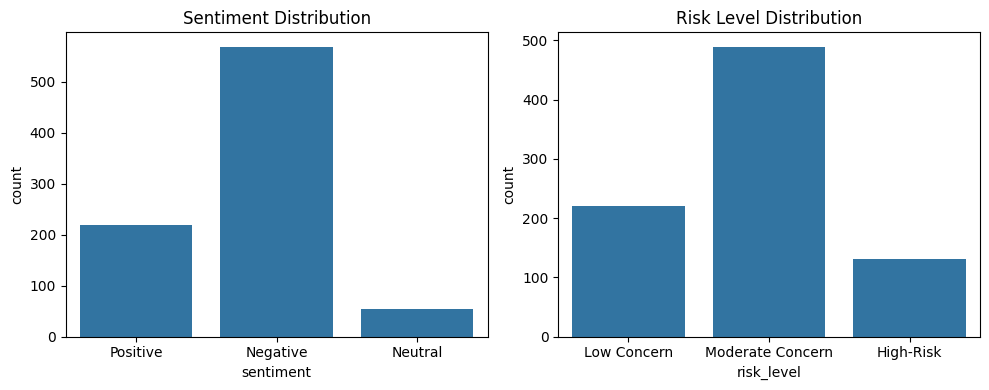

,post_id,timestamp,content,upvotes,comments,url,sentiment,risk_level
0,doqwow,1.572361e+09,mostbroken leastunderstood rules helpers may i...,2359,177,https://www.reddit.com/r/depression/comments/d...,Positive,High-Risk
1,1jl1ffp,1.743074e+09,really wish could die every single day life li...,89,7,https://www.reddit.com/r/depression/comments/1...,Negative,Moderate Concern
2,1jkx9lo,1.743055e+09,final cry help since nobody real life help im ...,102,21,https://www.reddit.com/r/depression/comments/1...,Negative,High-Risk
3,1jlde3j,1.743109e+09,seeking attention ive got nothing depressed un...,5,0,https://www.reddit.com/r/depression/comments/1...,Neutral,Moderate Concern
4,1jl42r3,1.743083e+09,could depression making absolutely horrible ma...,15,12,https://www.reddit.com/r/depression/comments/1...,Negative,Moderate Concern
5,1jl9qpi,1.743097e+09,want die feel like im suffocated live horrible...,4,0,https://www.reddit.com/r/depression/comments/1...,Negative,Low Concern
6,1jlcduo,1.743106e+09,difficultly helping depressed partner im 34m s...,2,1,https://www.reddit.com/r/depression/comments/1...,Positive,Moderate Concern
7,1jlbuo8,1.743103e+09,im done tired feel like every one get make fee...,2,0,https://www.reddit.com/r/depression/comments/1...,Negative,Low Concern
8,1jladvs,1.743099e+09,im tired everything dont know things ever get ...,2,0,https://www.reddit.com/r/depression/comments/1...,Negative,Moderate Concern
9,1jlby76,1.743104e+09,need help please hello really need someones gu...,1,1,https://www.reddit.com/r/depression/comments/1...,Positive,Moderate Concern


In [3]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# ========== Step 1: Load cleaned Reddit data ==========
print("📥 Loading preprocessed Reddit posts...")
df = pd.read_csv("output/task1_filtered_reddit_posts.csv")

# ========== Step 2: Sentiment Classification using VADER ==========
print("🔍 Running sentiment analysis (VADER)...")
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.3:
        return "Positive"
    elif score <= -0.3:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['content'].apply(classify_sentiment)

# ========== Step 3: Risk Level Detection based on keywords ==========
print("🚨 Assessing risk levels using keyword matching...")

# Optional: Use TF-IDF to extract common terms (not used directly here)
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['content'])
feature_names = tfidf.get_feature_names_out()

# Define high-risk keywords for crisis detection
high_risk_keywords = [
    "end it", "no longer", "don’t want to", "suicide", "kill myself", "disappear",
    "can’t go on", "worthless", "give up", "hopeless"
]

# Moderate-risk phrases
def classify_risk(text):
    text_lower = text.lower()
    if any(phrase in text_lower for phrase in high_risk_keywords):
        return "High-Risk"
    elif any(word in text_lower for word in ["feel lost", "need help", "relapse", "panic", "empty", "depressed"]):
        return "Moderate Concern"
    else:
        return "Low Concern"

df['risk_level'] = df['content'].apply(classify_risk)

# ========== Step 4: Save results to CSV ==========
df.to_csv("output/task2_sentiment_risk_classified.csv", index=False)
print("✅ Classification complete. File saved to output/task2_sentiment_risk_classified.csv")

# ========== Step 5: Visualize results ==========
print("📊 Generating bar plots...")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x='risk_level', data=df, order=["Low Concern", "Moderate Concern", "High-Risk"])
plt.title("Risk Level Distribution")

plt.tight_layout()
plt.savefig("output/task2_distribution_plot.png")
plt.show()

df.head(10)

In [7]:
import pandas as pd
import spacy
from collections import Counter
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import HeatMap

# ========== Step 1: Load the CSV ==========
print("📥 Reading CSV...")
df = pd.read_csv("output/task1_filtered_reddit_posts.csv")  # Adjusted to your output folder
nlp = spacy.load("en_core_web_sm")

# ========== Step 2: Extract location entities using spaCy ==========
print("📍 Extracting location entities...")
locations = []
for doc in nlp.pipe(df["content"].astype(str), disable=["tagger", "parser", "textcat"]):
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC"]:
            locations.append(ent.text.strip().lower())

# ========== Step 3: Filter out false positives (non-geographic terms) ==========
banlist = {"netflix", "phobia", "backgrounda", "us", "america", "china", "earth"}
filtered_locations = [loc for loc in locations if loc not in banlist]

# ========== Step 4: Geocode North America-based locations ==========
print("\n🗺️ Geocoding locations (North America only)...")
geolocator = Nominatim(user_agent="gsoc_mapper")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

geo_points = []  # For heatmap
na_location_counts = Counter()  # For frequency stats
top_markers = []  # For top 5 markers

for loc, count in Counter(filtered_locations).items():
    try:
        geo = geocode(loc)
        if geo and any(country in geo.address.lower() for country in ["united states", "canada", "mexico"]):
            geo_points.append([geo.latitude, geo.longitude, count])
            na_location_counts[loc] = count
        # else:
        #     print(f"🚫 Skipped (not in North America): {loc}")
    except Exception as e:
        print(f"❌ Error geocoding {loc}: {e}")

# ========== Step 5: Display top 5 locations in North America ==========
top_na_locations = na_location_counts.most_common(5)
print("\n🌎 Top 5 North American Locations:")
for name, count in top_na_locations:
    print(f"{name.title()} — {count} mentions")

# Add top 5 markers
for name, count in top_na_locations:
    geo = geocode(name)
    if geo:
        top_markers.append((name.title(), geo.latitude, geo.longitude, count))
        print(f"✅ Geocoded Top Location: {name.title()} -> ({geo.latitude}, {geo.longitude})")

# ========== Step 6: Create and save the heatmap ==========
print("\n🧪 Generating map...")
m = folium.Map(location=[39.5, -98.35], zoom_start=4)

# Add heatmap layer
HeatMap(geo_points, radius=20, blur=15).add_to(m)

# Add marker layer for top 5
for name, lat, lon, count in top_markers:
    folium.Marker(
        location=[lat, lon],
        popup=f"{name}: {count} posts",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

# Save as HTML
m.save("output/task3_crisis_heatmap.html")
print("\n✅ Map saved as output/task3_crisis_heatmap.html")



📥 Reading CSV...
📍 Extracting location entities...


c:\Users\fanyi\ISSR_GSoC_Test_YixingFan\env\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)



🗺️ Geocoding locations (North America only)...

🌎 Top 5 North American Locations:
Canada — 6 mentions
Florida — 5 mentions
California — 4 mentions
Sedona — 3 mentions
Texas — 3 mentions
✅ Geocoded Top Location: Canada -> (61.0666922, -107.991707)
✅ Geocoded Top Location: Florida -> (27.7567667, -81.4639835)
✅ Geocoded Top Location: California -> (36.7014631, -118.755997)
✅ Geocoded Top Location: Sedona -> (34.8688613, -111.7614394)
✅ Geocoded Top Location: Texas -> (31.2638905, -98.5456116)

🧪 Generating map...

✅ Map saved as output/task3_crisis_heatmap.html
